In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(X_train,y_train), (X_test,y_test) = mnist.load_data()

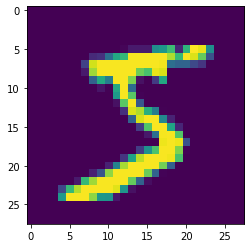

In [4]:
plt.imshow(X_train[0])

In [5]:
y_train[0]

5

In [6]:
X_train = X_train/255
X_test = X_test/255

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Reshape
from tensorflow.keras.optimizers import SGD

In [8]:
X_train.shape

(60000, 28, 28)

In [9]:
28*28

784

In [10]:
encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))
encoder.add(Dense(units=400, activation='relu'))
encoder.add(Dense(units=200, activation='relu'))
encoder.add(Dense(units=100, activation='relu'))
encoder.add(Dense(units=50, activation='relu'))
encoder.add(Dense(units=25, activation='relu'))

In [11]:
decoder =  Sequential()
decoder.add(Dense(units=50, input_shape=[25], activation='relu'))
decoder.add(Dense(units=100, activation='relu'))
decoder.add(Dense(units=200, activation='relu'))
decoder.add(Dense(units=400, activation='relu'))
decoder.add(Dense(units=784, activation='sigmoid'))
decoder.add(Reshape([28,28]))

In [12]:
autoencoder = Sequential([encoder,decoder])
autoencoder.compile(loss='binary_crossentropy', 
                    optimizer=SGD(learning_rate=1.5), 
                    metrics=['accuracy'])

In [13]:
autoencoder.fit(X_train, X_train, epochs=5, validation_data=(X_test,X_test))

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2461 - accuracy: 0.0884 - val_loss: 0.2116 - val_accuracy: 0.1244
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1878 - accuracy: 0.1572 - val_loss: 0.1629 - val_accuracy: 0.1897
Epoch 3/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1566 - accuracy: 0.2001 - val_loss: 0.1461 - val_accuracy: 0.2130
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1463 - accuracy: 0.2172 - val_loss: 0.1404 - val_accuracy: 0.2248
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1410 - accuracy: 0.2273 - val_loss: 0.1369 - val_accuracy: 0.2335


In [14]:
recon_image = autoencoder.predict(X_test[:10])

Original Image


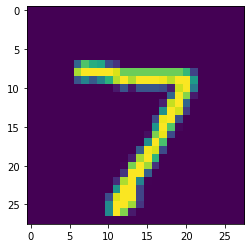

In [15]:
print('Original Image')
plt.imshow(X_test[0])

Reconstructed Image


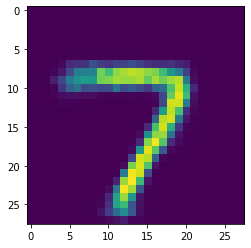

In [16]:
print('Reconstructed Image')
plt.imshow(recon_image[0])

In [17]:
recon_image[0].shape

(28, 28)